<h1><center>DSA 4212: Year 2020-2021</center></h1>
<h3><center> Assignment 2 (Deadline: 15th of April at midnight) </center></h3>
<h3><center> To Be submitted on lumiNUS </center></h3>
<h2><center> Group Number: ???? (check carefully on the Google Drive for Gp number updates)</center></h2>
<h2><center> **Filename naming convention**: assignment_2_XX.ipynb where XX is your group number</center></h2>
<h2><center> Group Member 1: Student Name, Student ID </center></h2>
<h2><center> Group Member 2: Student Name, Student ID </center></h2>
<h2><center> Group Member 3: Student Name, Student ID </center></h2>
<h2><center> Group Member 4: Student Name, Student ID </center></h2>
<h2><center> Group Member 5: Student Name, Student ID </center></h2>




In [2]:
if 'google.colab' in str(get_ipython()):
  # currently in colab
  from google.colab import drive
  drive.mount('/content/drive')
  # all data is under this path
  path_data = '/content/drive/MyDrive/DSA4212 Assignment 2/data'
elif 'lsm1' in str(os.getcwd()):
# if running on shaomin's computer
  path_data = os.path.join('..', 'data')
# else:
  # input your relative path to data here
  # path_data = os.path.join()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
%matplotlib inline
from jax.config import config
config.update("jax_enable_x64", True)  #important for L-BFGS

import jax
import jax.numpy as jnp

import pylab as plt
import imageio
from plotnine import *
import seaborn as sns

import os
from itertools import chain

import numpy as np
import numpy as onp
from skimage.transform import rescale, resize, downscale_local_mean
import pandas as pd
import scipy

from tqdm.notebook import tqdm

import random as random
from time import time
from time import sleep

# Exercise 1: Image inpainting

Load the image `img_bad.png` and restore it as well as you can.

**Remark**: if you use `L-BFGS` for image processing, it may be a good idea to set the tolerance to a low value i.e. to use the option `tol=10**-8` or something of that order

(-0.5, 511.5, 341.5, -0.5)

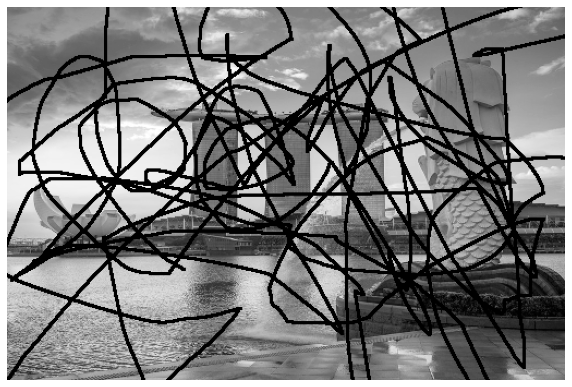

In [ ]:
#load image
path_img = "/Users/alekthiery/Google Drive/teaching/2021_DSA4212/assignments/assignment_2/data/img_bad.png"


im = onp.array(imageio.imread(path_img).astype(float)) / 255.

#display
plt.figure(figsize=(10,10))
plt.imshow(im, cmap="gray")
plt.axis("off")

In [ ]:
#** solution here **

# Exercise 2: image deblurring

Load the image `film.png` and restore it as well as you can.  

**Remark**: if you use `L-BFGS` for image processing, it may be a good idea to set the tolerance to a low value i.e. to use the option `tol=10**-8` or something of that order

(-0.5, 299.5, 241.5, -0.5)

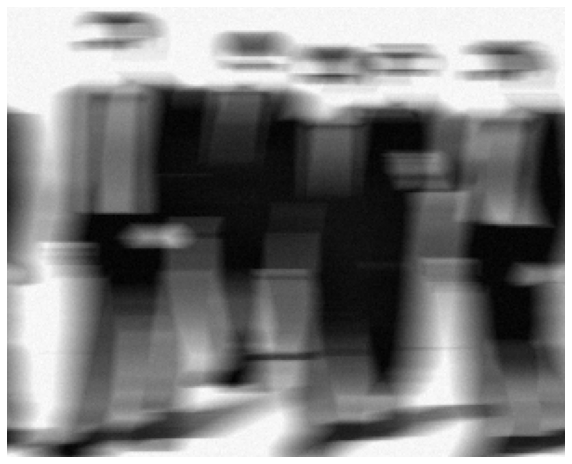

In [ ]:
#load image
path_img = os.path.join('/content/drive/MyDrive/DSA4212 Assignment 2/', "film.png")
im_blurred = onp.array(imageio.imread(path_img).astype(float))
#display
plt.figure(figsize=(10,10))
plt.imshow(im_blurred, cmap="gray")
plt.axis("off")

To do so, you can assume that this noisy image has been obtained by using the following process.

In [ ]:
def blurr(im):
    S = np.zeros_like(im)
    for k in range(30):
        S += np.roll(im, shift=(k+1), axis=1)
    return S/30.

#for some unkown clean image "im_clean"
# im_blurred = blurr(im_clean) + onp.random.normal(0,0.01,size=im_clean.shape)

#your job is to find back a good estimate of this unknown clean image.

In [ ]:
#** solution starts here **

In [ ]:
def deblur(im):
    S = onp.zeros_like(im)*30
    for k in range(30):
        S -= onp.roll(im, shift=-(k+1), axis=1) # shift array elements along horizontal axis.
    return S

In [ ]:
deblurred = deblur(im_blurred)

(-0.5, 299.5, 241.5, -0.5)

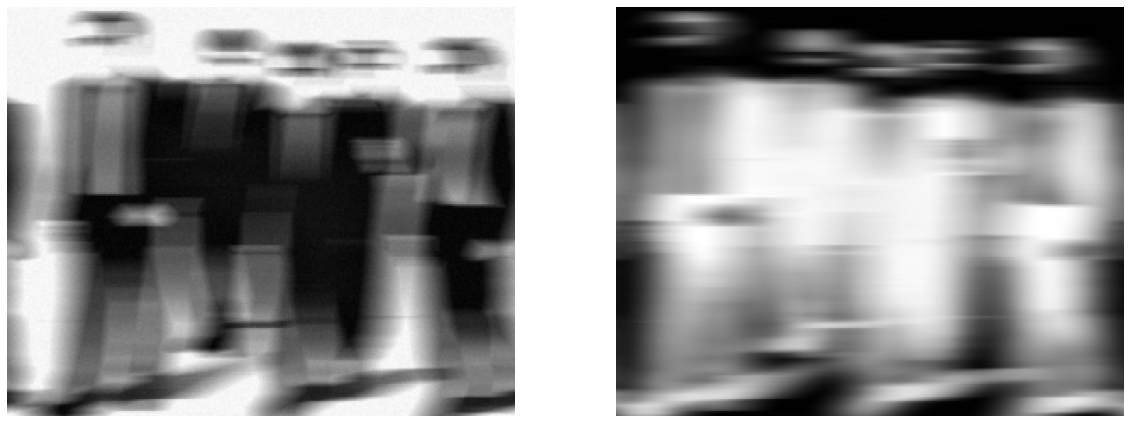

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
# plt.figure(figsize=(10,10))
plt.imshow(im_blurred, cmap="gray")
plt.axis("off")

plt.subplot(1,2,2)
# plt.figure(figsize=(10,10))
plt.imshow(deblurred, cmap="gray")
plt.axis("off")

# Exercise 3: Portfolio Optimization

Load the matrix $M \in \mathbb{R}^{500,500}$ contained in `mat_cov.npy` and the vector $u \in \mathbb{R}^{500}$ contained in `returns.npy`. We would maximize the function $\mathbb{R}^{500} \to \mathbb{R}$ defined as
$$F(w) =  \langle w,p \rangle - \frac{1}{2} \, \langle  w, M \, w \rangle$$
under the constraint that $w \in \mathbb{R}^{500}$ has all its coordinate larger or equal to zero and $\sum_{i=1}^{500} w_i = 1$. Find a way to approximate as accurately as possible the solution $w_\star$ of this contrained maximization problem. You are encouraged to read books / articles / blog-post. Except an `JAX` (or any other automatic differentiation package) and `scipy` (if you wish, for example, to use L-BFGS), you are not allowed to use any other library.

**remark:** this type of optimization problem is very often used in quantitative finance for portfolio optimization. 

**remark:** acknowledge very precisely the sources you are using. Failing to do so will be considered as plagiarism.



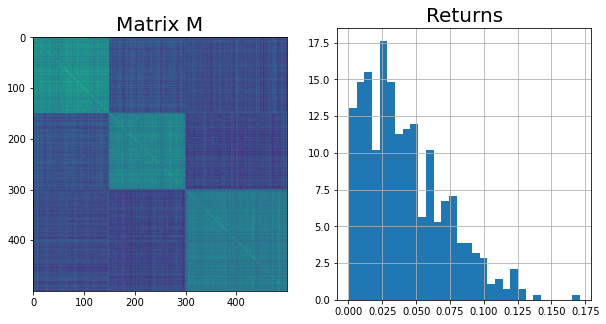

In [ ]:
# load data
U = onp.load("returns.npy", allow_pickle=True)
M = onp.load("mat_cov.npy", allow_pickle=True)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(M)
plt.title("Matrix M", fontsize=20)

plt.subplot(1,2,2)
plt.hist(U, bins=30, density=True)
plt.title("Returns", fontsize=20)
    plt.grid(True)

In [ ]:
#** solution starts here **

# Book recommendations

The files `books_data.zip` contains about one millions ratings of books. Design a recommendation system!

1. you will discuss the performance of your recommendatino system on the test data.
2. you are allowed to use any technique that you deem appropriate (i.e. do not hesitate to read books / articles / blog-posts / etc).

**remark:** acknowledge very precisely the sources you are using. Failing to do so will be considered as plagiarism.



## Exploration & Cleaning  

In [4]:
ratings_train = pd.read_csv(os.path.join(path_data, "book/assignment_ratings_train.csv"), low_memory=False)
ratings_test = pd.read_csv(os.path.join(path_data, "book/assignment_ratings_test.csv"), low_memory=False)
users = pd.read_csv(os.path.join(path_data, "book/assignment_users.csv"), low_memory=False)
books = pd.read_csv(os.path.join(path_data, "book/assignment_books.csv"), low_memory=False)

In [5]:
users.apply(lambda x: pd.Series({'Count': len(x), 
                                 'UniqueCount': len(x.unique()),
                                 'Sample': x.unique().tolist()
                                })
            , axis = 0).T

,Count,UniqueCount,Sample
user,278858,278858,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
location,278858,57339,"[nyc, new york, usa, stockton, california, usa..."
age,278858,166,"[nan, 18.0, 17.0, 61.0, 26.0, 14.0, 25.0, 19.0..."


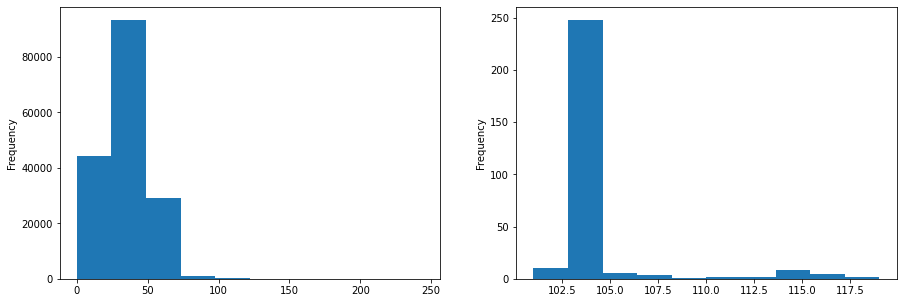

In [6]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
users.age.plot.hist()

plt.subplot(1,2,2)
users[(users.age>100) & (users.age<120)].age.plot.hist()

**Age value**  

The age distribution looks ridiculous as there are some with age = 0 and some age that is more than 100 over years of age.  

There are also cases whereby there are age values that are null.  

Therefore we can clean the data in the following fashion:
* for each age value that is invalid  
* find all the books that this person has read
* find all person who has read the same book as this person
* take the average age of all these people  

Rationale being the people of the same age more or less tend to read the same type of books. Hence we would assume that their age will be similar if they read similar books.  

In [7]:
%%time 
# code for cleaning age  
users_goodAge = users[(users.age>0) & (users.age<105)]
users_badAge = users[~users.user.isin(users_goodAge.user)]
users_goodAge.shape[0] + users_badAge.shape[0] == users.shape[0]

# find all books read by each user
users_badAge = pd.merge(users_badAge[['user']],
         ratings_train[['user',	'ISBN']],
         on = 'user', how = 'left')

# find all other who has read the same books
users_badAge = pd.merge(
    users_badAge,
    ratings_train[['user',	'ISBN']],
    on = 'ISBN', how = 'left',
    suffixes = ('', '_peer_reader')
)

# get the age of the peers who read these books
users_badAge = pd.merge(
    users_badAge,
    users_goodAge[['user', 'age']],
    left_on = 'user_peer_reader', right_on = 'user',
    how = 'left', suffixes = ('', 'peer_user')
)

users_badAge = users_badAge.groupby('user').agg({'age':lambda x:x.mean()})
users_badAge['age'] = users_badAge.age.fillna(users_goodAge.age.mean())

CPU times: user 8.65 s, sys: 810 ms, total: 9.46 s
Wall time: 8.46 s


In [8]:
users = pd.concat([users_goodAge, users_badAge])

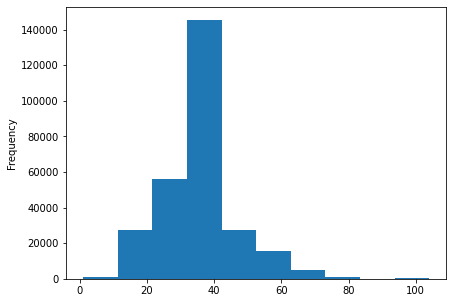

In [9]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
users.age.plot.hist()


In [10]:
def ageGroup(age):
  if age<=10:
    return 'Kid'
  elif age<=18:
    return 'Teenager'
  elif age<=35:
    return 'Young Adult'
  elif age<=60:
    return 'Adult'
  else:
    return 'Elderly'

users['AgeGroup'] = users.age.apply(ageGroup)

In [11]:
users

,user,location,age,AgeGroup
1,2.0,"stockton, california, usa",18.000000,Teenager
3,4.0,"porto, v.n.gaia, portugal",17.000000,Teenager
5,6.0,"santa monica, california, usa",61.000000,Elderly
9,10.0,"albacete, wisconsin, spain",26.000000,Young Adult
10,11.0,"melbourne, victoria, australia",14.000000,Teenager
...,...,...,...,...
278850,NaN,NaN,34.760586,Young Adult
278854,NaN,NaN,37.043478,Adult
278856,NaN,NaN,34.760586,Young Adult
278857,NaN,NaN,34.760586,Young Adult


In [12]:
books.apply(lambda x: pd.Series({'Count': len(x), 
                                 'UniqueCount': len(x.unique()),
                                 'Sample': x.unique().tolist()
                                })
            , axis = 0).T

,Count,UniqueCount,Sample
ISBN,271360,271360,"[0195153448, 0002005018, 0060973129, 037415706..."
title,271360,242135,"[Classical Mythology, Clara Callan, Decision i..."
author,271360,102024,"[Mark P. O. Morford, Richard Bruce Wright, Car..."
year,271360,118,"[2002, 2001, 1991, 1999, 2000, 1993, 1996, 198..."


In [12]:
ratings_train.apply(lambda x: pd.Series({'Count': len(x), 
                                 'UniqueCount': len(x.unique()),
                                 'Sample': x.unique().tolist()
                                })
            , axis = 0).T

,Count,UniqueCount,Sample
ratings,303569,10,"[5, 3, 8, 6, 7, 10, 9, 4, 1, 2]"
user,303569,63212,"[276726, 276729, 276736, 276737, 276744, 27674..."
ISBN,303569,144421,"[0155061224, 052165615X, 3257224281, 060057096..."


In [13]:
test = ratings_train.groupby(['user']).agg({'ISBN':len, 'ratings': lambda x: 'All'})

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


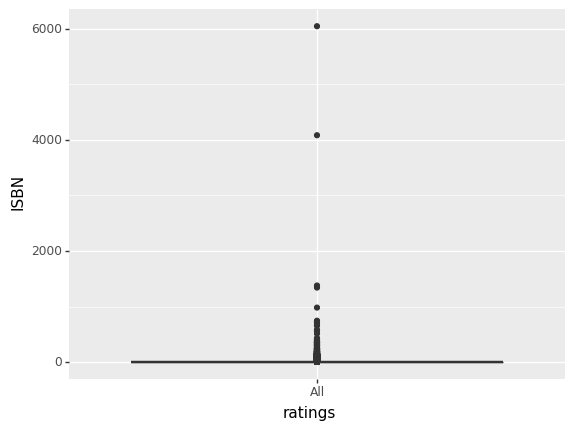

<ggplot: (8762558160929)>

In [14]:
ggplot(test) +\
geom_boxplot(aes(x = 'ratings', y = 'ISBN'))

/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:360: PlotnineWarning: stat_bin : Removed 282 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


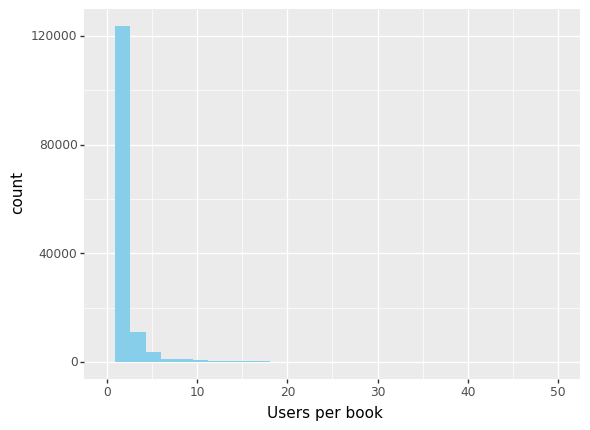

<ggplot: (8772976467005)>

In [ ]:
ggplot(ratings_train.groupby(['ISBN']).agg({'user':len})) +\
geom_histogram(aes(x = 'user'), bins = 30, fill = 'skyblue') +\
xlab("Users per book") +\
xlim(0, 50)

Most of the books are only reviewed by small number of readers.  

/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:360: PlotnineWarning: stat_bin : Removed 2495 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


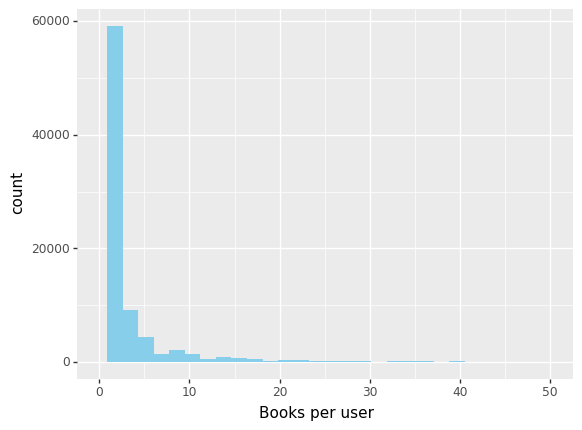

<ggplot: (8734102074785)>

In [ ]:
ggplot(ratings_train.groupby(['user']).agg({'ISBN':len})) +\
geom_histogram(aes(x = 'ISBN'), bins = 30, fill = 'skyblue') +\
xlab("Books per user") +\
xlim(0, 50)

In [ ]:
ratings_test.apply(lambda x: pd.Series({'Count': len(x), 
                                 'UniqueCount': len(x.unique()),
                                 'Sample': x.unique().tolist()
                                })
            , axis = 0).T

,Count,UniqueCount,Sample
ratings,130102,10,"[6, 9, 8, 3, 10, 5, 7, 4, 2, 1]"
user,130102,37824,"[276729, 276747, 276748, 276762, 276772, 27678..."
ISBN,130102,76419,"[0521795028, 0060517794, 0679776818, 074755816..."


In [ ]:
pd.merge(ratings_train, ratings_test,
         on = ['user','ISBN'], how= 'inner')
# of course none of the user, ISBN pair appear in both Test, Train  

,ratings_x,user,ISBN,ratings_y


In [ ]:
tu = len(ratings_test['user'].unique())
print(f'Test Users count: {tu}')

tuit = sum(pd.Series(ratings_test['user'].unique()).isin(ratings_train['user'].unique()))
print(f'Test User found in Train: {tuit}')

Test Users count: 37824
Test User found in Train: 23231


There are two parts to this prediction:  

* some user whom we have some of their rating preferences
  * therefore we can predict ratings according to their taste
* users whom we have **NO** rating records
  * can only estimate their rating via information such as the author popularity or the user's age, location etc.  

In [ ]:
# at least all users are found in record
sum(~ratings_test['user'].isin(users['user'].unique()))

38630

In [ ]:
ratings_test['UserRated'] = ratings_test['user'].isin(ratings_train['user'].unique())

In [ ]:
# books not found
sum(~(pd.Series(ratings_test['ISBN'].unique()).isin(ratings_train['ISBN'].unique())) &
    ~(pd.Series(ratings_test['ISBN'].unique()).isin(books['ISBN'].unique())))

ratings_test['BookInMasterList'] = ratings_test['ISBN'].isin(books['ISBN'].unique())
ratings_test['BookInTrain'] = ratings_test['ISBN'].isin(ratings_train['ISBN'].unique())

temp = ratings_test.groupby(['ISBN', 'BookInMasterList', 'BookInTrain']).agg({'user':len})

temp = ratings_test.groupby(['ISBN', 'BookInMasterList', 'BookInTrain']).agg({'user':len})
temp.reset_index(inplace = True)

a = sum(~temp['BookInTrain'] & temp['BookInMasterList'])
b = sum(temp['BookInTrain'] & ~temp['BookInMasterList'])
c = sum(~temp['BookInTrain'] & ~temp['BookInMasterList'])
d = sum(temp['BookInTrain'] & temp['BookInMasterList'])
print(f'{a:10} Books not in master but in Training')
print(f'{b:10} Books in master but not in Training')
print(f'{c:10} Books not in master and not in Training')
print(f'{d:10} Books in master and in Training')

     32113 Books not in master but in Training
      3213 Books in master but not in Training
      9439 Books not in master and not in Training
     31654 Books in master and in Training


It is a problem that for some books, we have completely no information about the rating of the books.  Hence for such books, we will predict using a separate algorithm.  

In [ ]:
ratings_test

,ratings,user,ISBN,UserRated,BookInMasterList,BookInTrain
0,0,276733,2080674722,False,True,True
1,6,276737,0600570967,False,False,False
2,10,276745,342310538,False,False,True
3,0,276746,0425115801,True,True,True
4,0,276746,0553561618,True,True,True
...,...,...,...,...,...,...
344929,0,276704,0679752714,True,True,False
344930,5,276704,0806917695,True,True,False
344931,0,276706,0679447156,False,True,True
344932,10,276721,0590442449,False,True,True


## Train-Val-Test Split

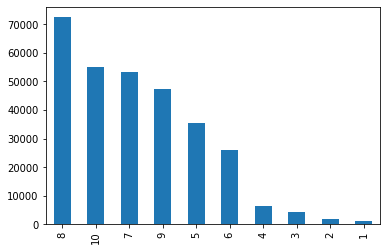

In [13]:
ratings_train.ratings.value_counts().plot.bar()

In [14]:
# select random rows from the Training data and use those as the Training data
# the rest as Validation Set  

training_data = ratings_train.sample(frac=0.8, 
                                     random_state=4212)
validation_data = ratings_train[~ratings_train.index.isin(training_data.index)]

In order to simulate the true test data, take some books out from the training set and place into validation set such that it is made sure that X number of books are completely unseen to the test set.  

In [15]:
exclusive_books = training_data.ISBN.sample(1500, random_state=4212)
exclusive_data = training_data[training_data.ISBN.isin(exclusive_books)]

training_data = training_data[~training_data.ISBN.isin(exclusive_books)]
validation_data = pd.concat([validation_data, exclusive_data])

There should also be a set of users that only appears in the test data  

In [16]:
exclusive_user = training_data.user.sample(100, random_state=4212)
exclusive_data = training_data[training_data.user.isin(exclusive_user)]

training_data = training_data[~training_data.user.isin(exclusive_user)]
validation_data = pd.concat([validation_data, exclusive_data])

In [17]:

training_data.apply(lambda x: pd.Series({'Count': len(x), 
                                 'UniqueCount': len(x.unique()),
                                 'Sample': x.unique().tolist()
                                })
            , axis = 0).T

,Count,UniqueCount,Sample
ratings,214075,10,"[10, 5, 8, 9, 2, 7, 6, 4, 1, 3]"
user,214075,52537,"[104880, 11601, 26598, 2399, 277203, 36836, 12..."
ISBN,214075,114614,"[0821225987, 0684839571, 0440212561, 067187601..."


In [18]:

validation_data.apply(lambda x: pd.Series({'Count': len(x), 
                                 'UniqueCount': len(x.unique()),
                                 'Sample': x.unique().tolist()
                                })
            , axis = 0).T

,Count,UniqueCount,Sample
ratings,89494,10,"[5, 8, 4, 7, 10, 9, 6, 3, 2, 1]"
user,89494,27695,"[276726, 276762, 276768, 276780, 276788, 27681..."
ISBN,89494,51927,"[0155061224, 0380711524, 3453092007, 905786805..."


In [19]:
validation_data[~(validation_data.ISBN.isin(training_data.ISBN)) &
                ~(validation_data.user.isin(training_data.user))]

,ratings,user,ISBN
0,5,276726,0155061224
16,4,276768,9057868059
54,10,276835,3125785006
105,9,276862,1569312435
229,9,276965,9722900684
...,...,...,...
195626,8,172742,0312983492
115249,8,98391,0553582554
180302,5,158295,0897214315
92104,8,79441,0711006865


Text(0.5, 1.0, 'Validation Data')

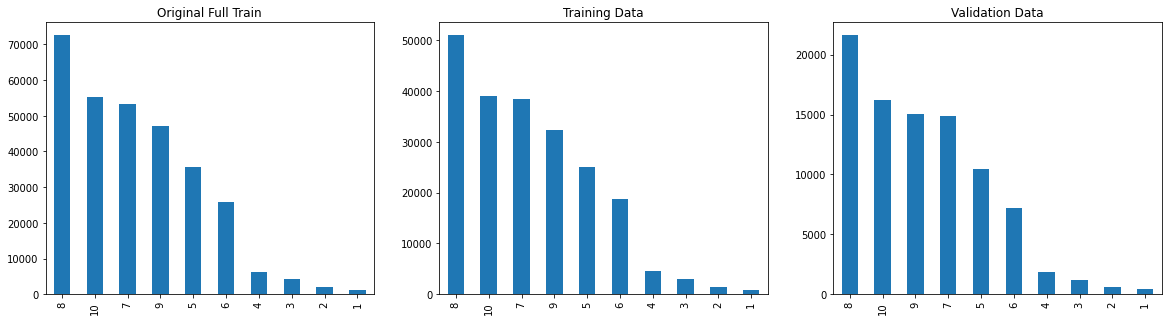

In [20]:
plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
ratings_train.ratings.value_counts().plot.bar()
plt.title('Original Full Train')

plt.subplot(1,3,2)
training_data.ratings.value_counts().plot.bar()
plt.title('Training Data')

plt.subplot(1,3,3)
validation_data.ratings.value_counts().plot.bar()
plt.title('Validation Data')

## Models  

In general, there are a few possible situations during prediction depending on the book:   

A. Both the user and the book appear in training data   

B. Nobody in the training data has ever rated the book before    
  * predict the rating based on the information about the user only  
  * only the user appeared in the training data

C. There is rating information about this book by other users
  * the user has not appeared in the training data
  * but we have the age and location information of the user in the master list  
  * can use method such as mean reversion etc  

D. No information about the user and the book completely in the training data  

**Symbols**

$R_{u, b}$: ratings given by user-**u** to book-**b**  
$B(u)$: the set of books rated by user-**u**  
$U(b)$: the set of users that has rated book-**b**  

In [21]:
def compare(a,b):
  if a>b:
    return 'Under Estimate'
  elif b>a:
    return 'Over Estimate'
  else:
    return 'Correct'

def evalPred(actual, pred):
  df = pd.DataFrame({
      'Actual': list(actual),
      'Pred': list(pred)
  })

  df['sqDiff'] = (df['Actual'] - df['Pred'])**2
  df['errDirection'] =  df.apply(lambda x: compare(x.Actual, x.Pred), axis = 1)
  loss = df['sqDiff'].mean()
  print(f'Loss values = {loss}')

  plt.figure(figsize = (10, 5))

  plt.subplot(1,2,1)
  df.errDirection.value_counts().plot.barh()
  plt.title('Error Analysis')  

  plt.subplot(1,2,2)
  temp = df.groupby(['Actual', 'Pred']).agg({'sqDiff': len})
  temp['sqDiff'] = temp['sqDiff'].apply(lambda x: np.log(x))
  temp.reset_index(inplace = True)

  temp2 = pd.pivot_table(temp, values = 'sqDiff', index = 'Pred', columns = 'Actual')
  temp2.sort_index(ascending = 0, inplace  =True)
  sns.heatmap(temp2, linewidth=0.5)
  

In [22]:
  def splitData(data, training_data):
    A_data = data[(data.user.isin(training_data.user)) &\
                       (data.ISBN.isin(training_data.ISBN))]

    B_data = data[(data.user.isin(training_data.user)) &\
                       ~(data.ISBN.isin(training_data.ISBN))]

    C_data = data[~(data.user.isin(training_data.user)) &\
                       (data.ISBN.isin(training_data.ISBN))]

    D_data = data[~(data.user.isin(training_data.user)) &\
                       ~(data.ISBN.isin(training_data.ISBN))]
    return A_data, B_data, C_data, D_data

In [122]:
class ModelInterface():

  def __init__(self, 
               training_data = training_data, 
               validation_data = validation_data,
               books = books,
               users = users):
    self.training_data = training_data
    self.validation_data = validation_data
    self.books = books
    self.users = users

    # must overwrite
    self.actual = None
    self.prediction = None

    # make this parent attribute instead
    self.modelHistory = {
        'time' : [],
        'loss_train' : [],
        'loss_test' : [],
        'best_model': None, # keep track of the best model so far, according to test loss
        'best_testLoss': None
    }

  def optimise(self):
    '''
    optimisation code is written here
    
    target must minimally have 4 columns:
    * ratings
    * user
    * ISBN
    '''
    pass

  def reportOpti(self):
    '''
    plotting loss versus time
    '''
    plt.plot(LRestimator.modelHistory['time'], 
         LRestimator.modelHistory['loss_train'], "-", label = 'Train Loss')
    plt.plot(LRestimator.modelHistory['time'], 
            LRestimator.modelHistory['loss_test'], "-", label = 'Test Loss')
    plt.xlabel("compute time (sec)")
    plt.ylabel("loss function")
    plt.yscale("log")
    plt.grid(True)
    plt.legend()

  def predict(self):
    '''
    predict class should overwirte the self.actual and self.prediction
    so that the values can be used for evalPrediction

    make sure you keep a record of the target, for the prediction or other
    purpose
    '''
    pass

  def evalPrediction(self):
    '''each model will be able to evaluate its own performance'''
    return evalPred(self.actual, self.prediction)


# inheriting Model
class Recommender(ModelInterface):
  '''
  for the ease of handling all 4 situations 
  Recommender class can be used to make the code more reusable

  There should be 4 models taken into recommender,
  each model designed to handle one specific case
  '''

  def __init__(self, models,
               training_data = training_data,
               validation_data = validation_data,
               books = books,
               users = users):
    
    super().__init__(training_data = training_data,
                     validation_data = validation_data,
                   books = books,
                   users = users)

    # 4 models
    self.situations = 'ABCD'
    self.models = dict(zip(self.situations, models))

  def splitData(self, data):
    A_data = data[(data.user.isin(self.training_data.user)) &\
                       (data.ISBN.isin(self.training_data.ISBN))]

    B_data = data[(data.user.isin(self.training_data.user)) &\
                       ~(data.ISBN.isin(self.training_data.ISBN))]

    C_data = data[~(data.user.isin(self.training_data.user)) &\
                       (data.ISBN.isin(self.training_data.ISBN))]

    D_data = data[~(data.user.isin(self.training_data.user)) &\
                       ~(data.ISBN.isin(self.training_data.ISBN))]
    return A_data, B_data, C_data, D_data

  def optimise(self):
    '''
    fit all 4 models that it has on 4 separate data it has
    '''
    target = self.validation_data

    # validation data splitted into 4 situations
    datas = self.splitData(target)
    datas = dict(zip(self.situations, datas))

    for sit in self.situations:
      data = datas[sit]
      self.models[sit].validation_data = data
      self.models[sit].optimise()

  def predict(self):
    target = self.validation_data
    # validation data splitted into 4 situations
    datas = self.splitData(target)
    datas = dict(zip(self.situations, datas))

    for sit in self.situations:
      data = datas[sit]
      self.models[sit].validation_data = data
      self.models[sit].predict()

  def evalPrediction(self):
    # plt.figure(figsize=(20, 5))
    # i = 1
    self.actual = []
    self.prediction = []
    for sit in self.situations:
      # plt.subplot(1, len(self.situations), i)
      self.models[sit].evalPrediction()
      plt.suptitle(f'Situation {sit}')

      self.actual = chain(self.actual, self.models[sit].actual)
      self.prediction = chain(self.prediction, self.models[sit].prediction)

    super().evalPrediction()
    plt.suptitle("Overall")

    

### Baseline Models

Validation Data for each situation  

In [123]:
a,b,c,d = splitData(validation_data, training_data)

#### Mean Method  



$$
\hat{R}_{u,b} = \begin{cases}
   \text{if}  |U(b)| > 0 & \frac{1}{|U(b)|} (\sum_{u_i\in{U(b)}}R_{(u_i,b)}) \\
   \text{elif } |B(u)| > 0 & \frac{1}{|B(u)|}(\sum_{b_i\in B(u)}R_{(u, b_i)}) \\
  \text{else} & \frac{1}{|U||B|}(\sum_{u_i \in U} \sum_{b_j \in B} R_{(u_i, b_j)})
\end{cases}
$$

For every $\hat{R}_{u,b}$, look for all other users who has read this book-**b**, and take the mean of these ratings.  
If nobody else has read this book before, then find all books that has been read by user-**u**, and take the mean of the ratings  
If this user has read no books, then take the global mean of all ratings  


The following also servers as a code demo for the Recommender Class.  

#### Situation A & C  

Reminder:
A: Book and user both in the training data  
C: Book in training, but the user not in training  

In [169]:
# situation A
class meanOfBookRating(ModelInterface):

  def __init__(self,
               training_data = training_data,
               validation_data = a,
               books = books,
               users = users):
    
    super().__init__(training_data = training_data,
                     validation_data = validation_data,
                   books = books,
                   users = users)
  # no optimisation
  # no opti report

  def predict(self):
    target = self.validation_data
    # it is gurateed that all input given 
    # to this model should be all searchable in the training 
    self.actual = target.ratings

    # find all others whom has read this book
    bl1_pred = pd.merge(target, self.training_data,
                        on = 'ISBN', how = 'left', suffixes = ('', '_peer'))
    # find the ratings of all peers whom has read this book
    bl1_pred = bl1_pred.groupby(['user','ISBN']).agg({'ratings_peer': lambda x:x.mean()})
    bl1_pred['ratings_peer'] = bl1_pred['ratings_peer'].apply(lambda x: round(x))
    bl1_pred.reset_index(inplace = True)
    self.prediction = bl1_pred.ratings_peer

Loss values = 4.760626234545321


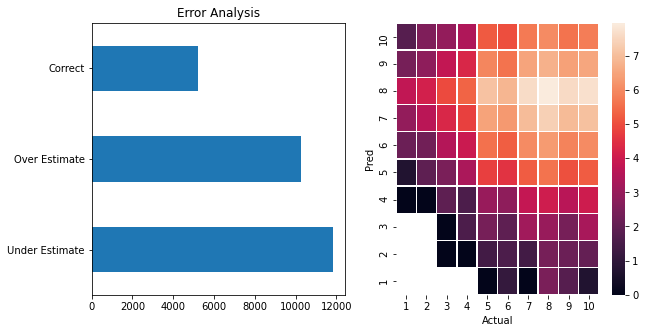

In [170]:
simpleA = meanOfBookRating(validation_data = a)
simpleA.predict()
simpleA.evalPrediction()

Loss values = 4.916654186011682


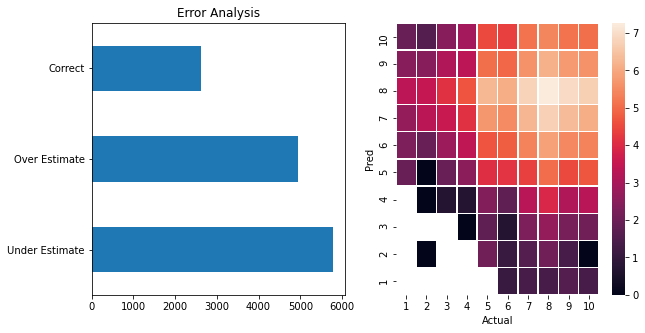

In [174]:
simpleC = meanOfBookRating(validation_data = c)
simpleC.predict()
simpleC.evalPrediction()

#### Situation B   

If nobody is reading this book, then look for all books ever read by this user. and report the average ratings.  

In [177]:
# situation B
class meanOfUserRating(ModelInterface):

  def __init__(self,
               training_data = training_data,
               validation_data = b,
               books = books,
               users = users):
    
    super().__init__(training_data = training_data,
                     validation_data = validation_data,
                   books = books,
                   users = users)

  # no optimisation
  # no opti report

  def predict(self):
    target = self.validation_data
    # it is gurateed that all input given 
    # to this model should be all searchable in the training 
    self.actual = target.ratings

    # find the average ratings of all books that this each user has ever rated before
    bl1_pred = pd.merge(target, self.training_data,
            on = 'user', how = 'left', 
            suffixes = ('', '_otherReading'))
    
    bl1_pred = bl1_pred.groupby(['user','ISBN']).agg({'ratings_otherReading': lambda x:x.mean()})
    bl1_pred['ratings_otherReading'] = bl1_pred['ratings_otherReading'].apply(lambda x: round(x))
    bl1_pred.reset_index(inplace = True)
    self.prediction = bl1_pred.ratings_otherReading

Loss values = 5.01914421172658


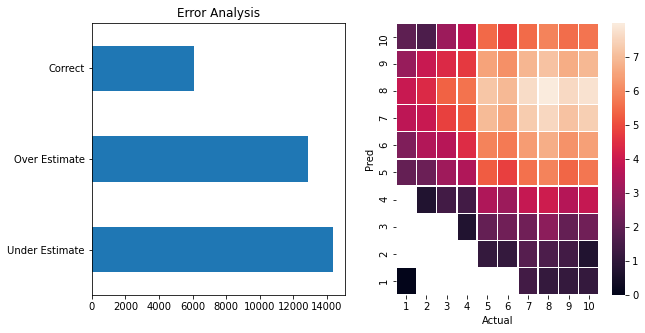

In [178]:
simpleB = meanOfUserRating(validation_data = b)
simpleB.predict()
simpleB.evalPrediction()

#### Situation D  

If the user is not in the training data, then simply take the global average  

In [179]:
# situation D
class GlobalMean(ModelInterface):

  def __init__(self,
               training_data = training_data,
               validation_data = d,
               books = books,
               users = users):
    
    super().__init__(training_data = training_data,
                     validation_data = validation_data,
                   books = books,
                   users = users)

  # no optimisation
  # no opti report

  def predict(self):
    target = self.validation_data
    # it is gurateed that all input given 
    # to this model should be all searchable in the training 
    self.actual = target.ratings

    # find the global mean of the training data
    global_mean = round(self.training_data.ratings.mean())
    target = target.copy()
    target['pred'] = target.ratings.apply(lambda x: global_mean)

    self.prediction = target.pred

Loss values = 3.9258206254846213


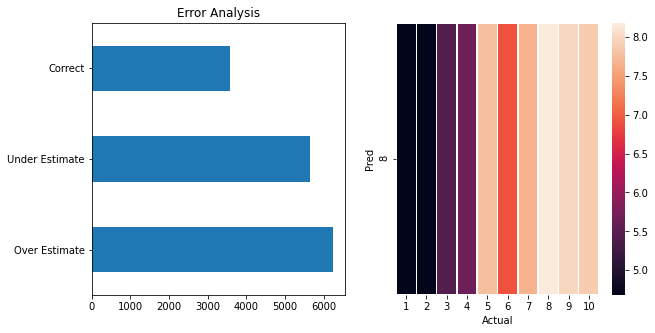

In [180]:
simpleD = GlobalMean(validation_data = d)
simpleD.predict()
simpleD.evalPrediction()

#### Complete Recommender  

In [185]:
simpleA = meanOfBookRating(validation_data=a)
simpleB = meanOfUserRating(validation_data=b)
simpleC = meanOfBookRating(validation_data=c)
simpleD = GlobalMean(validation_data=d)

baseLineRecommender = Recommender(models = [
                                            simpleA,
                                            simpleB,
                                            simpleC,
                                            simpleD
])

In [186]:
%%time
baseLineRecommender.predict()

CPU times: user 5.36 s, sys: 294 ms, total: 5.66 s
Wall time: 5.29 s


Loss values = 4.760626234545321
Loss values = 5.01914421172658
Loss values = 4.916654186011682
Loss values = 3.9258206254846213
Loss values = 4.735814691487698
CPU times: user 5.15 s, sys: 541 ms, total: 5.69 s
Wall time: 5.18 s


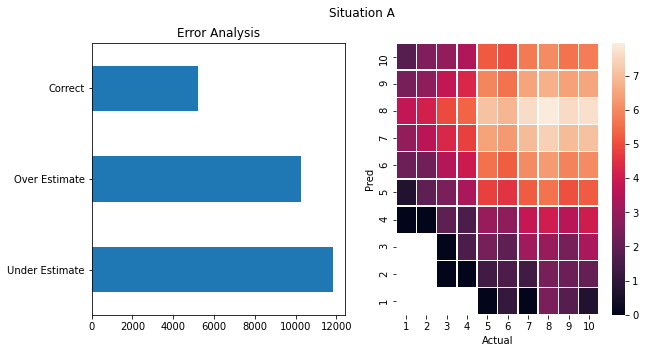

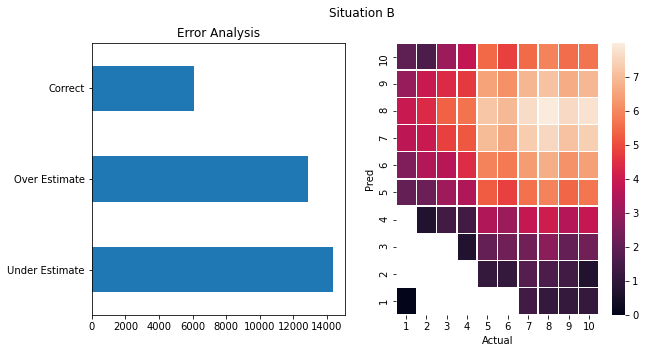

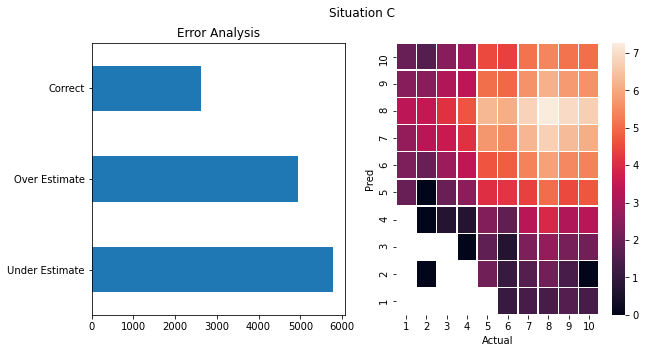

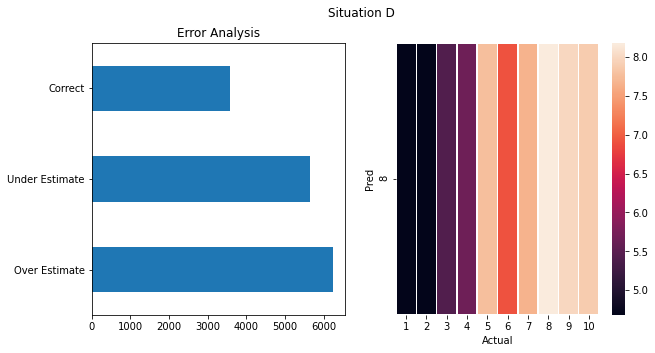

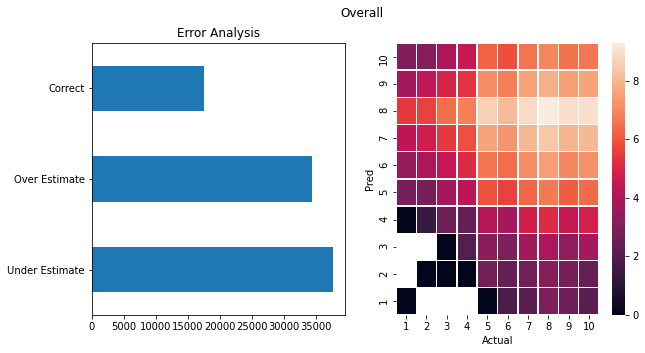

In [187]:
%%time
baseLineRecommender.evalPrediction()

### Low Rank Estimator  

Let the the rating be $R_{|U| \times |B|} $,   
Then approximate:  

$$
\hat R = M_{|U| \times rank} \times N_{rank \times |B|}  
$$  

The loss is then computed by:  
$$
Loss(\hat R) = Mean((R - \hat R)^2)  
$$

In [157]:
# jax not working, not sure why?
@jax.jit
def jaxloss(M, N, actual, user_pos, book_pos):

  hat = jnp.sum( (M[user_pos,:]) * (N[book_pos,:]), axis=1 )

  return jnp.mean((actual - hat)**2)

jaxloss_grad = jax.jit(jax.grad(jaxloss, argnums=(0,1)))
# jaxloss_grad = jax.grad(jaxloss, argnums=(0,1))

class SingleVector(ModelInterface):

  def __init__(self, opti_iter=500, learn_rate = 0.1, rank = 20,
               training_data = training_data,
               validation_data = a,
               books = books,
               users = users):
    
    super().__init__(training_data = training_data,
                     validation_data = validation_data,
                   books = books,
                   users = users)

    self.rank = rank


    self.Ratings = pd.concat([self.training_data,
                          self.validation_data])
    # self.RatingJNP = jnp.array(self.Ratings)

    # self.R = pd.pivot_table(self.Ratings, values = 'ratings', index = 'user', columns='ISBN')
    # user and their index
    allusers = self.Ratings.user.unique()
    allusers = dict(zip(allusers, range(len(allusers))))
    allbooks = self.Ratings.ISBN.unique()
    # book and indices
    allbooks = dict(zip(allbooks, range(len(allbooks))))

    self.trainusers = jnp.array([allusers[user] for user in self.training_data.user], dtype=jnp.int32)
    self.trainbooks = jnp.array([allbooks[isbn] for isbn in self.training_data.ISBN], dtype=jnp.int32)
    self.trainratings = jnp.array(self.training_data.ratings)

    self.valusers = jnp.array([allusers[user] for user in self.validation_data.user], dtype=jnp.int32)
    self.valbooks = jnp.array([allbooks[isbn] for isbn in self.validation_data.ISBN],  dtype=jnp.int32)
    self.valratings = jnp.array(self.validation_data.ratings)

    # R hat = M * N
    self.M = onp.random.normal(0,1, size=(len(allusers), self.rank))
    self.N = onp.random.normal(0,1, size=(self.rank, len(allbooks))).T

    self.learningRate = learn_rate
    self.iterations = opti_iter

    self.start = time()

  def loss(self, method = 'train'):
    if method =='train':
      u_pos = self.trainusers
      b_pos = self.trainbooks
      actual = self.trainratings

    else:
      u_pos = self.valusers
      b_pos = self.valbooks
      actual = self.valratings

    return jaxloss(self.M, self.N, actual, u_pos, b_pos)

  def grad(self, method = 'train'):
    if method =='train':
      u_pos = self.trainusers
      b_pos = self.trainbooks
      actual = self.trainratings

    else:
      u_pos = self.valusers
      b_pos = self.valbooks
      actual = self.valratings

    return jaxloss_grad(self.M, self.N, actual, u_pos, b_pos)
  
  def iterOpti(self):
    # process for each iteration

    # compute the direction
    M_grad, N_grad = self.grad(method = 'train')
    self.M -= self.learningRate * M_grad
    self.N -= self.learningRate * N_grad

    # find and record the new train/val loss
    now = time()
    time_taken = time() - self.start
    self.modelHistory['time'].append(time_taken)
    self.modelHistory['loss_train'].append(self.loss(method = 'train'))
    self.modelHistory['loss_test'].append(self.loss(method = 'test'))


  def optimise(self, iterations = None):
    iterations = self.iterations if not iterations else iterations

    self.modelHistory['loss_train'].append(self.loss(method = 'train'))
    self.modelHistory['loss_test'].append(self.loss(method = 'test'))
    self.modelHistory['time'].append(0)
    self.start

    t = tqdm(range(iterations), desc='Optimisation', bar_format='{percentage:3.0f}% {r_bar} {desc:<100}', leave=True)
    for i in t:
      cur_trainloss = float(self.modelHistory['loss_train'][-1])
      cur_testloss = float(self.modelHistory['loss_test'][-1])

      # optimise
      self.iterOpti()

      # update progress bar every 10 iterations
      if i % 10 == 0:
        t.set_description(f"Optimisation:    TrainLoss = {cur_trainloss:10.2f}    TestLoss = {cur_testloss:10.2f}")
        t.refresh() # to show immediately the update

  def predict(self):
    hat = jnp.sum( (self.M[self.valusers,:]) * (self.N[self.valbooks,:]), axis=1 )
    
    self.actual = self.validation_data.ratings
    # self.prediction = pd.Series(round(hat))
    # normalised
    self.prediction = round((hat - min(hat))/(max(hat) - min(hat)) * 10)
    self.prediction = pd.Series(self.prediction)



Loss values = 12.490306533030946


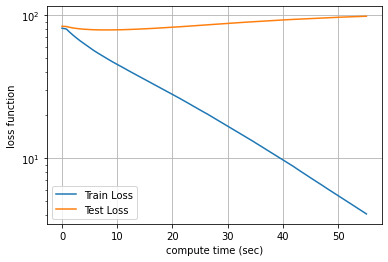

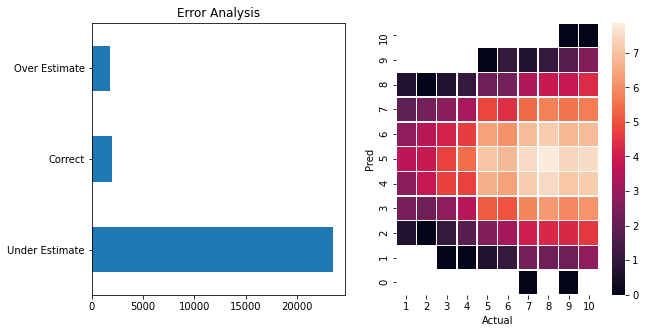

In [158]:
# clearly over-fitted
LRestimator = SingleVector(validation_data = a,
                           learn_rate = 10, 
                           rank = 20)
LRestimator.optimise()
LRestimator.reportOpti()

LRestimator.predict()
LRestimator.evalPrediction()

Bright spot are far from the axis, which means the prediction are far from actual.  

But some ratings are of ridiculous values, of negative and more than 10.  


Loss values = 10.233228473187504


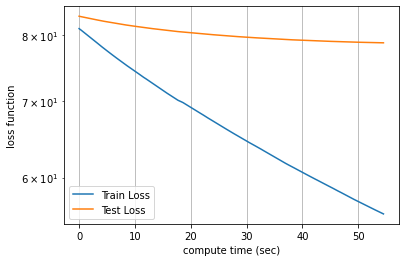

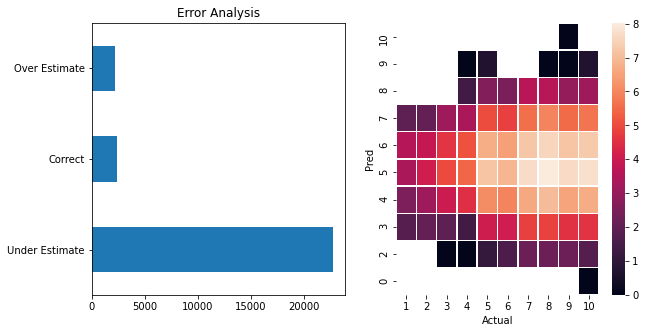

In [159]:
# clearly over-fitted
LRestimator = SingleVector(validation_data = a,
                           learn_rate = 1, 
                           rank = 20)
LRestimator.optimise()
LRestimator.reportOpti()

LRestimator.predict()
LRestimator.evalPrediction()

Slightly better, but under-estimation is still a huge problem.  


Loss values = 12.89454239520082


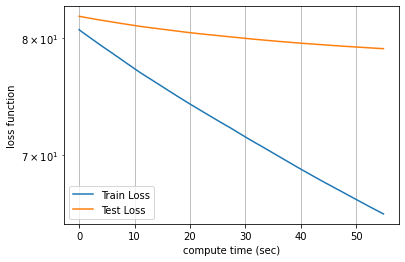

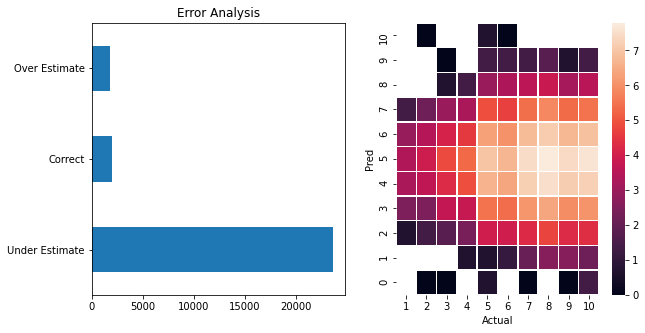

In [160]:
# clearly over-fitted
LRestimator = SingleVector(validation_data = a,
                           learn_rate = 0.5, 
                           rank = 20)
LRestimator.optimise()
LRestimator.reportOpti()

LRestimator.predict()
LRestimator.evalPrediction()


Loss values = 14.605091813592802


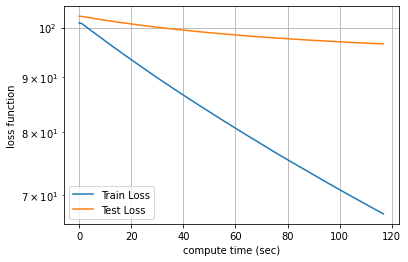

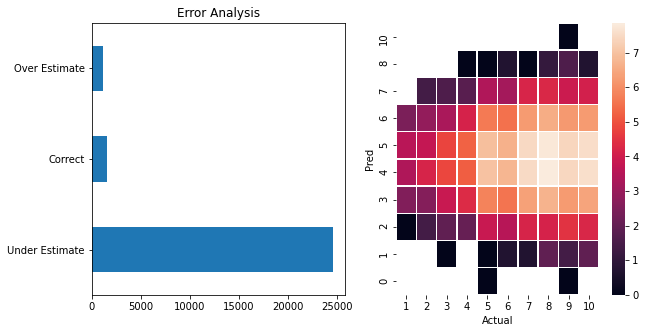

In [161]:
LRestimator = SingleVector(validation_data = a,
                           learn_rate = 0.5, 
                           rank = 40)
LRestimator.optimise()
LRestimator.reportOpti()

LRestimator.predict()
LRestimator.evalPrediction()


Loss values = 12.286890043163362


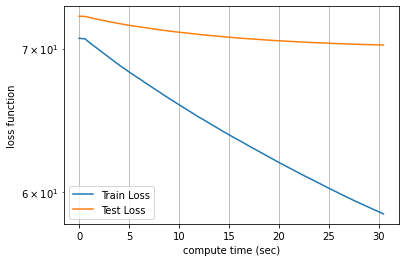

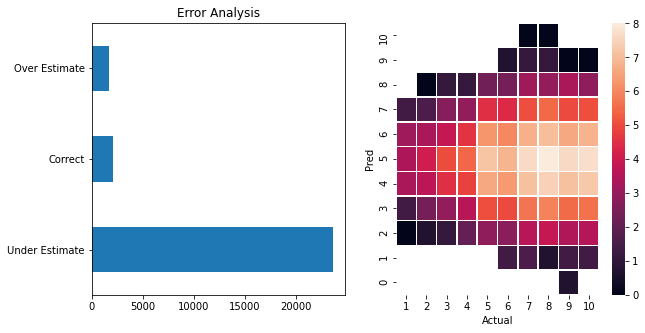

In [162]:
LRestimator = SingleVector(validation_data = a,
                           learn_rate = 1, 
                           rank = 10)
LRestimator.optimise()
LRestimator.reportOpti()

LRestimator.predict()
LRestimator.evalPrediction()

Lowering the rank seems to do a lot better and faster.  


Loss values = 12.21892603701807


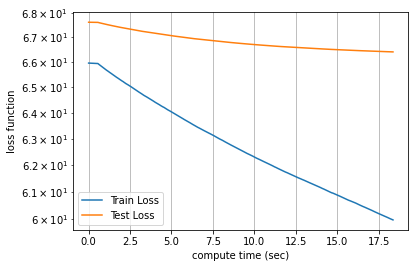

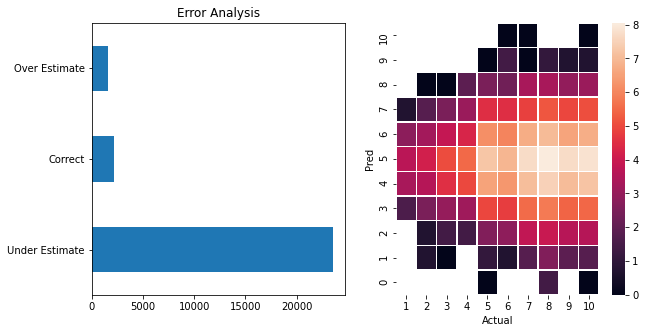

In [163]:

LRestimator = SingleVector(validation_data = a,
                           opti_iter=500,
                           learn_rate = 1, 
                           rank = 5)
LRestimator.optimise()
LRestimator.reportOpti()

LRestimator.predict()
LRestimator.evalPrediction()


Loss values = 13.160948130806936


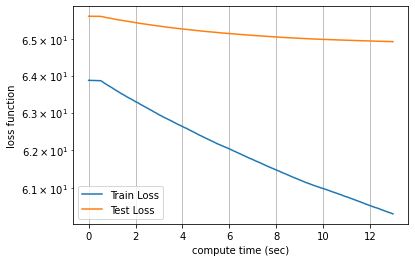

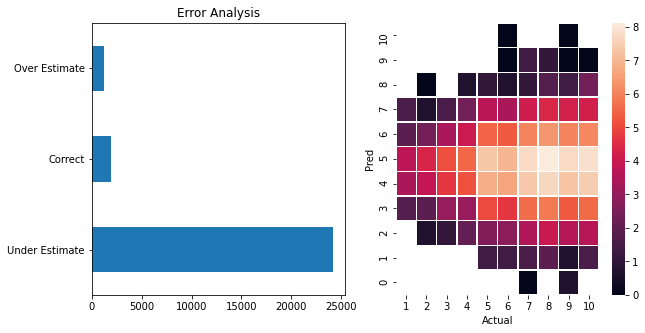

In [164]:
LRestimator = SingleVector(validation_data = a,
                           opti_iter=500,
                           learn_rate = 1, 
                           rank = 3)
LRestimator.optimise()
LRestimator.reportOpti()

LRestimator.predict()
LRestimator.evalPrediction()

### User Reversion Towards the Mean  

$$
\hat{R}_{u,b} = \frac{1}{\alpha + |B(u)|} (\alpha M + \sum_{b_i\in{B(u)}}R_{(u,b_i)})
$$

Let 
- $M$ is the total mean of all the ratings 
- $B(u)$ is the set of books rated by user $u$, and $\alpha > 0$ is a parameter of the model.  

We shall choose $\alpha$ using optimisation methods, choosing the alpha that gives the loss.  

This is usable for situation A and situation B.  

In [178]:

@jax.jit
def jaxloss(alpha, R, M):
  actual = R[:,0]
  hat = (R[:,1] + alpha*M)/(alpha + R[:,2])
  # print(actual.shape)
  # print(hat.shape)
  return jnp.mean((actual - hat)**2)

jaxloss_grad = jax.jit(jax.grad(jaxloss, argnums=0))

class UserMeanReversion(ModelInterface):

  def __init__(self, opti_iter=500, learn_rate = 0.1, alpha = 0.1,
               training_data = training_data,
               validation_data = a,
               books = books,
               users = users):
    
    super().__init__(training_data = training_data,
                     validation_data = validation_data,
                   books = books,
                   users = users)

    self.alpha = alpha
    self.M = self.training_data.ratings.mean()

    # user, ISBN, ratings_otherbooks, ISBN_otherbooks
    self.training_R = pd.merge(self.training_data, self.training_data,
                               on = 'user', how = 'left', suffixes = ('', '_otherbooks'))
    self.training_R = self.training_R.groupby(['user', 'ISBN']).agg({'ratings_otherbooks': sum,
                                                                     'ISBN_otherbooks': len})
    self.training_R.reset_index(inplace = True)
    self.training_R = pd.merge(self.training_data, self.training_R,
                               on = ['user', 'ISBN'], how='inner', suffixes = ('_actual', '_prediction'))
    self.training_R = jnp.array(self.training_R.loc[:,['ratings', 'ratings_otherbooks', 'ISBN_otherbooks']])
    ##################################
    self.validation_R = pd.merge(self.validation_data, self.training_data,
                               on = 'user', how = 'left', suffixes = ('', '_otherbooks'))
    self.validation_R = self.validation_R.groupby(['user', 'ISBN']).agg({'ratings_otherbooks': sum,
                                                                     'ISBN_otherbooks': len})
    self.validation_R.reset_index(inplace = True)
    self.validation_R = pd.merge(self.validation_data, self.validation_R,
                               on = ['user', 'ISBN'], how='inner', suffixes = ('_actual', '_prediction'))
    self.validation_R = jnp.array(self.validation_R.loc[:,['ratings', 'ratings_otherbooks', 'ISBN_otherbooks']])
    ####################################

    self.learningRate = learn_rate
    self.iterations = opti_iter

    self.start = time()

  def loss(self, method = 'train'):
    if method =='train':
      R = self.training_R
    else:
      R = self.validation_R
    return jaxloss(self.alpha, R, self.M)

  def grad(self, method = 'train'):
    if method =='train':
      R = self.training_R
    else:
      R = self.validation_R
    return jaxloss_grad(self.alpha, R, self.M)
  
  def iterOpti(self):
    # process for each iteration

    # compute the direction
    alpha_grad = self.grad(method = 'train')
    self.alpha -= self.learningRate * alpha_grad

    # find and record the new train/val loss
    now = time()
    time_taken = time() - self.start
    self.modelHistory['time'].append(time_taken)
    self.modelHistory['loss_train'].append(self.loss(method = 'train'))
    self.modelHistory['loss_test'].append(self.loss(method = 'test'))


  def optimise(self, iterations = None):
    iterations = self.iterations if not iterations else iterations

    self.modelHistory['loss_train'].append(self.loss(method = 'train'))
    self.modelHistory['loss_test'].append(self.loss(method = 'test'))
    self.modelHistory['time'].append(0)
    self.start

    t = tqdm(range(iterations), desc='Optimisation', bar_format='{percentage:3.0f}% {r_bar} {desc:<100}', leave=True)
    for i in t:
      cur_trainloss = float(self.modelHistory['loss_train'][-1])
      cur_testloss = float(self.modelHistory['loss_test'][-1])

      # optimise
      self.iterOpti()

      # update progress bar every 10 iterations
      if i % 10 == 0:
        t.set_description(f"Optimisation:    TrainLoss = {cur_trainloss:10.2f}    TestLoss = {cur_testloss:10.2f}")
        t.refresh() # to show immediately the update

  def predict(self):
    hat = (self.validation_R[:,1] + self.alpha*self.M)/(self.alpha + self.validation_R[:,2])
    
    self.actual = pd.Series(round(self.validation_R[:,0]))
    self.prediction = pd.Series(round(hat))



Loss values = 2.8825444436315752


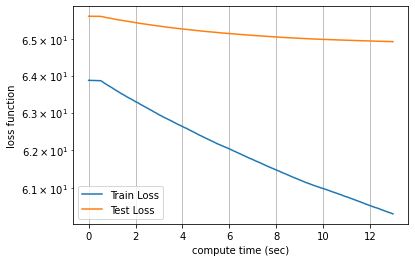

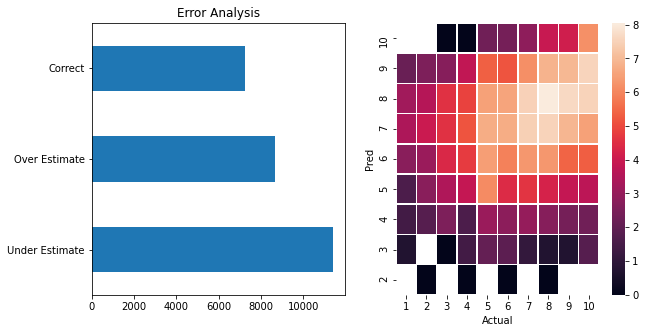

In [182]:
meanEsti = UserMeanReversion(validation_data = a,
                             opti_iter = 1000,
                           learn_rate = 0.001, 
                           alpha = 0.5)
meanEsti.optimise()
meanEsti.reportOpti()

meanEsti.predict()
meanEsti.evalPrediction()


Loss values = 2.970297754041993


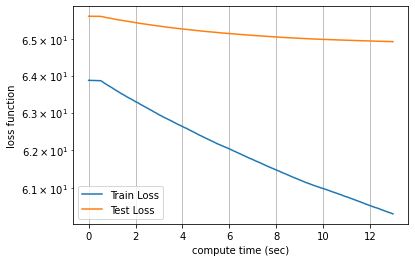

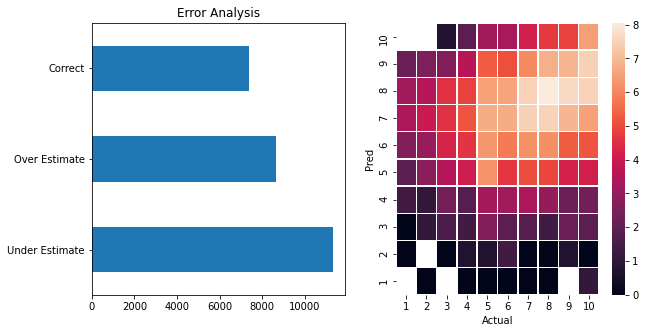

In [184]:
meanEsti = UserMeanReversion(validation_data = a,
                             opti_iter = 10000,
                           learn_rate = 0.001, 
                           alpha = 0.5)
meanEsti.optimise()
meanEsti.reportOpti()

meanEsti.predict()
meanEsti.evalPrediction()


Loss values = 2.970297754041993


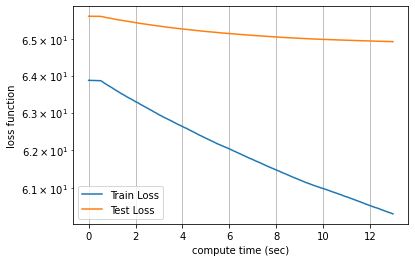

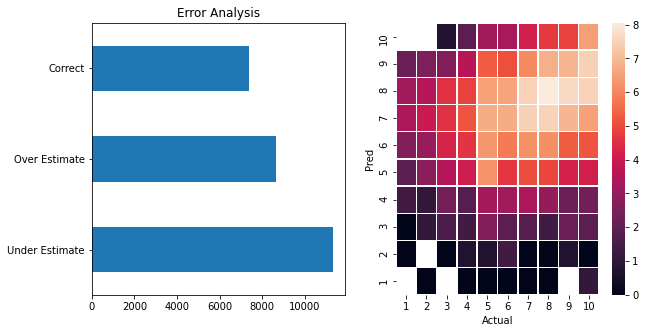

In [186]:
meanEsti = UserMeanReversion(validation_data = a,
                             opti_iter = 10000,
                           learn_rate = 0.001, 
                           alpha = 0.9)
meanEsti.optimise()
meanEsti.reportOpti()

meanEsti.predict()
meanEsti.evalPrediction()


Loss values = 3.1174458380843784


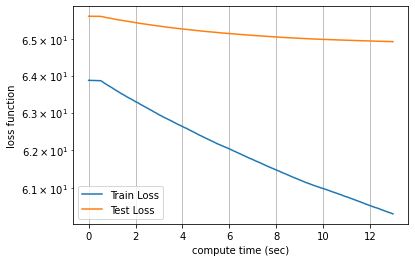

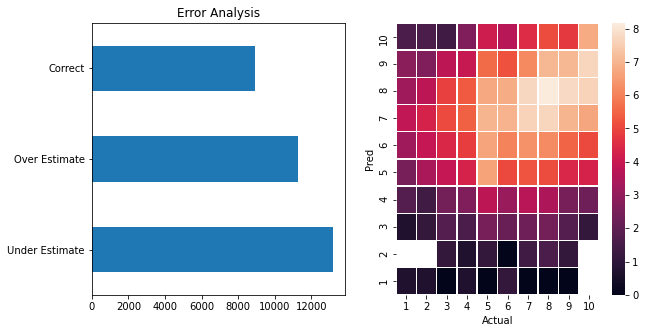

In [187]:
meanEsti = UserMeanReversion(validation_data = b,
                             opti_iter = 10000,
                           learn_rate = 0.001, 
                           alpha = 0.9)
meanEsti.optimise()
meanEsti.reportOpti()

meanEsti.predict()
meanEsti.evalPrediction()

### Book Reversion Towards the Mean  

$$
\hat{R}_{u,b} = \frac{1}{\alpha + |U(b)|} (\alpha M + \sum_{u_i\in{U(b)}}R_{(u_i,b)})
$$

Let 
- $M$ is the total mean of all the ratings 
- $U(b)$ is the set of users rated book $b$, and $\alpha > 0$ is a parameter of the model.  

We shall choose $\alpha$ using optimisation methods, choosing the alpha that gives the loss.  

This is usable for situation A and situation C.    

In [188]:

@jax.jit
def jaxloss(alpha, R, M):
  actual = R[:,0]
  hat = (R[:,1] + alpha*M)/(alpha + R[:,2])
  # print(actual.shape)
  # print(hat.shape)
  return jnp.mean((actual - hat)**2)

jaxloss_grad = jax.jit(jax.grad(jaxloss, argnums=0))

class BookMeanReversion(UserMeanReversion):

  def __init__(self, opti_iter=500, learn_rate = 0.1, alpha = 0.1,
               training_data = training_data,
               validation_data = a,
               books = books,
               users = users):
    
    super().__init__(training_data = training_data,
                     validation_data = validation_data,
                   books = books,
                   users = users)

    self.alpha = alpha
    self.M = self.training_data.ratings.mean()

    # user, ISBN, ratings_otherbooks, ISBN_otherbooks
    self.training_R = pd.merge(self.training_data, self.training_data,
                               on = 'ISBN', how = 'left', suffixes = ('', '_peers'))
    self.training_R = self.training_R.groupby(['ISBN','user']).agg({'ratings_peers': sum,
                                                                     'user_peers': len})
    self.training_R.reset_index(inplace = True)
    self.training_R = pd.merge(self.training_data, self.training_R,
                               on = ['user', 'ISBN'], how='inner', suffixes = ('_actual', '_prediction'))
    self.training_R = jnp.array(self.training_R.loc[:,['ratings', 'ratings_peers', 'user_peers']])
    ##################################
    self.validation_R = pd.merge(self.validation_data, self.training_data,
                               on = 'ISBN', how = 'left', suffixes = ('', '_peers'))
    self.validation_R = self.validation_R.groupby(['ISBN', 'user']).agg({'ratings_peers': sum,
                                                                     'user_peers': len})
    self.validation_R.reset_index(inplace = True)
    self.validation_R = pd.merge(self.validation_data, self.validation_R,
                               on = ['user', 'ISBN'], how='inner', suffixes = ('_actual', '_prediction'))
    self.validation_R = jnp.array(self.validation_R.loc[:,['ratings', 'ratings_peers', 'user_peers']])
    ####################################

    self.learningRate = learn_rate
    self.iterations = opti_iter

    self.start = time()




In [ ]:
  def loss(self, method = 'train'):
    if method =='train':
      R = self.training_R
    else:
      R = self.validation_R
    return jaxloss(self.alpha, R, self.M)

  def grad(self, method = 'train'):
    if method =='train':
      R = self.training_R
    else:
      R = self.validation_R
    return jaxloss_grad(self.alpha, R, self.M)
  
  def iterOpti(self):
    # process for each iteration

    # compute the direction
    alpha_grad = self.grad(method = 'train')
    self.alpha -= self.learningRate * alpha_grad

    # find and record the new train/val loss
    now = time()
    time_taken = time() - self.start
    self.modelHistory['time'].append(time_taken)
    self.modelHistory['loss_train'].append(self.loss(method = 'train'))
    self.modelHistory['loss_test'].append(self.loss(method = 'test'))


  def optimise(self, iterations = None):
    iterations = self.iterations if not iterations else iterations

    self.modelHistory['loss_train'].append(self.loss(method = 'train'))
    self.modelHistory['loss_test'].append(self.loss(method = 'test'))
    self.modelHistory['time'].append(0)
    self.start

    t = tqdm(range(iterations), desc='Optimisation', bar_format='{percentage:3.0f}% {r_bar} {desc:<100}', leave=True)
    for i in t:
      cur_trainloss = float(self.modelHistory['loss_train'][-1])
      cur_testloss = float(self.modelHistory['loss_test'][-1])

      # optimise
      self.iterOpti()

      # update progress bar every 10 iterations
      if i % 10 == 0:
        t.set_description(f"Optimisation:    TrainLoss = {cur_trainloss:10.2f}    TestLoss = {cur_testloss:10.2f}")
        t.refresh() # to show immediately the update

  def predict(self):
    hat = (self.validation_R[:,1] + self.alpha*self.M)/(self.alpha + self.validation_R[:,2])
    
    self.actual = pd.Series(round(self.validation_R[:,0]))
    self.prediction = pd.Series(round(hat))


Loss values = 4.132306679347429


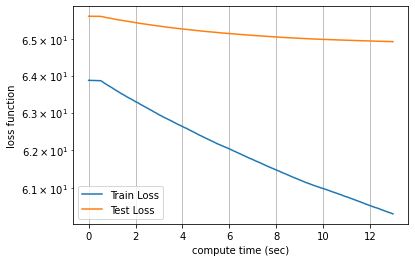

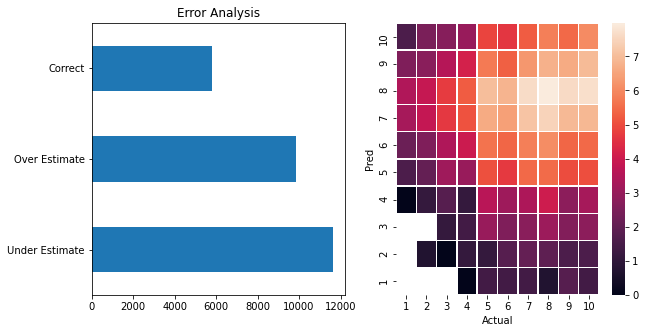

In [191]:
meanEsti = BookMeanReversion(validation_data = a,
                             opti_iter = 10000,
                           learn_rate = 0.001, 
                           alpha = 0.9)
meanEsti.optimise()
meanEsti.reportOpti()

meanEsti.predict()
meanEsti.evalPrediction()


Loss values = 4.12790175228396


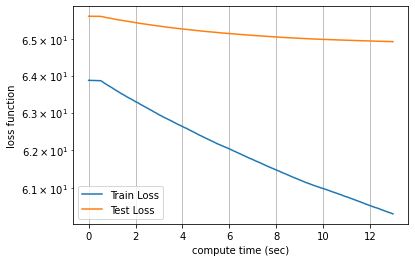

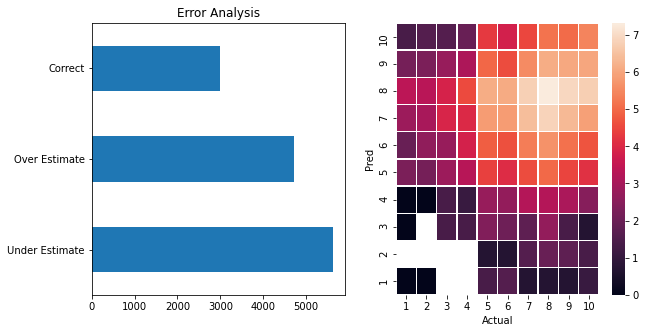

In [190]:
meanEsti = BookMeanReversion(validation_data = c,
                             opti_iter = 10000,
                           learn_rate = 0.001, 
                           alpha = 0.9)
meanEsti.optimise()
meanEsti.reportOpti()

meanEsti.predict()
meanEsti.evalPrediction()